In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv',
                      thousands = ',')

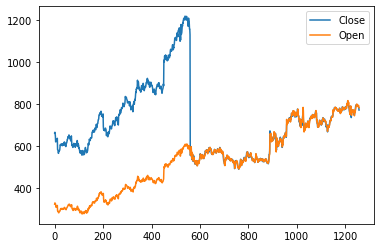

In [17]:
df_train.head()
train_set = df_train['Open'].values

df_train

plt.plot(df_train['Close'], label = 'Close')
plt.plot(df_train['Open'], label = 'Open')
plt.legend()
plt.show()

In [23]:
timestep = 60
X_train = []
y_train = train_set[timestep:]

for i in range(timestep, len(train_set)):
    X_train.append(train_set[i-timestep:i])

X_train = np.asarray(X_train)
    
print(X_train.shape)
print(y_train.shape)

print(train_set[-2:])
print(X_train[-1])
print(y_train[-1])

(1198, 60)
(1198,)
[783.33 782.75]
[779.31 779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85
 798.24 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89
 778.2  767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97
 755.2  766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07
 757.44 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4
 797.34 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33]
782.75


In [26]:
import pickle

pickle_out = open('stock.pkl', 'wb')
pickle.dump((X_train, y_train), pickle_out)
pickle_out.close()

<h1>Preprocessing für Testdaten</h1>

In [27]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv',
                      thousands = ',')

In [46]:
test_set = df_test['Open'].values

y_test = test_set.copy()


X_test = np.concatenate((train_set[-timestep:] , y_test[:-1]))

X_test_final = []

for i in range(timestep, len(test_set)+timestep):
    X_test_final.append(X_test[i-timestep:i])

X_test_final = np.asarray(X_test_final)
X_test_final = X_test_final[:,:, np.newaxis]

print(X_test_final.shape)
print(y_test.shape)

X_test_final

(20, 60, 1)
(20,)


array([[[779.  ],
        [779.66],
        [777.71],
        ...,
        [793.7 ],
        [783.33],
        [782.75]],

       [[779.66],
        [777.71],
        [786.66],
        ...,
        [783.33],
        [782.75],
        [778.81]],

       [[777.71],
        [786.66],
        [783.76],
        ...,
        [782.75],
        [778.81],
        [788.36]],

       ...,

       [[795.47],
        [782.89],
        [778.2 ],
        ...,
        [822.3 ],
        [829.62],
        [837.81]],

       [[782.89],
        [778.2 ],
        [767.25],
        ...,
        [829.62],
        [837.81],
        [834.71]],

       [[778.2 ],
        [767.25],
        [750.66],
        ...,
        [837.81],
        [834.71],
        [814.66]]])

In [ ]:
import pickle

file = open('stock_test.pkl', 'wb')
pickle.dump()